In [134]:
import geopandas as gpd
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [135]:
path = os.path.dirname(os.getcwd()) +  "\\GIS\\Files\\land_use_sub_basin_mechelbach_split_*.gpkg"

In [136]:
files = glob.glob(path)

In [137]:
lst_layers = []
for i, file in enumerate(files):
    gdf = gpd.read_file(file)
    gdf = gdf[["Landuse",'area_ha']]
    gdf["area_ha"] = gdf["area_ha"] / gdf["area_ha"].sum() * 100
    section_name = file.split("_")[-1].split(".")[0]
    gdf.rename(columns={"area_ha":section_name, "Landuse":"percentage_per_landuse"},inplace=True)
    lst_layers.append(gdf.set_index("percentage_per_landuse").T)

In [138]:
df = pd.concat(lst_layers).fillna(0)
df.index = df.index.astype(int)
df.sort_index(inplace=True)
df.to_excel("combined_landuse_percentages_per_catchment.xlsx")

In [139]:
lst_layers_ha = []
for i, file in enumerate(files):
    gdf = gpd.read_file(file)
    gdf = gdf[["Landuse",'area_ha']]
    # gdf["area_ha"] = gdf["area_ha"] / gdf["area_ha"].sum() * 100
    section_name = file.split("_")[-1].split(".")[0]
    gdf.rename(columns={"area_ha":section_name, "Landuse":"ha_per_landuse"},inplace=True)
    lst_layers_ha.append(gdf.set_index("ha_per_landuse").T)

In [140]:
df_ha = pd.concat(lst_layers_ha).fillna(0)
df_ha.sum(axis=1).sum()

1070.0819269455537

In [141]:
df_ha['total_area'] = df_ha.sum(axis=1)
df_ha.index = df_ha.index.astype(int)
df_ha.sort_index(inplace=True)

In [142]:
subbasin_file = os.path.dirname(os.getcwd()) + "\\GIS\\Files\\sub_basins_mechelbach_dissolved2.gpkg"

In [167]:
gdf = gpd.read_file(subbasin_file)
df_area = gdf[['section_number','area_ha']].set_index('section_number')
df_area.sort_index(inplace=True)

In [168]:
df_area.to_excel("area_per_catchment.xlsx")

In [169]:
df_Q = pd.read_excel("results_Q.xlsx")
df_Q.set_index("Section",inplace=True)

In [253]:
df_TWI = pd.read_csv("TWI per catchment2.csv")[['section_number','TWI__average','TWI__sum']]
df_TWI = df_TWI.set_index("section_number")
df_TWI.index = df_TWI.index.astype(int)
df_TWI.sort_index(inplace=True)

In [254]:
df_combined = pd.concat([df_Q, df_area,df,df_TWI],axis=1)

In [255]:
df_combined['Q_specific'] = df_combined['Q'] / df_combined['area_ha'] * 10**(-4) * 86400

In [256]:
df_combined.sort_values("area_ha",ascending=False)

,Q,area_ha,Forest,Settlement,Agriculture,Transport,Natural surfaces,Water,TWI__average,TWI__sum,Q_specific
1,190.00,221.691019,16.286943,4.709982,73.883741,2.802838,2.316497,0.000000,9.796246,868701.729205,7.404901
3,93.10,138.814514,74.066660,2.222837,21.463650,2.010968,0.235885,0.000000,9.937165,551771.029745,5.794668
26,14.56,106.096899,14.125312,1.702600,81.607673,1.910632,0.653782,0.000000,9.771860,414707.963010,1.185693
4,3.69,81.469700,60.894703,0.000000,34.496244,2.575278,2.033775,0.000000,9.427233,307214.666424,0.391331
19,10.51,80.412148,36.154917,5.894247,53.081109,3.545238,1.324490,0.000000,9.028921,290415.254631,1.129262
12,5.66,75.749650,20.789841,13.979297,60.671524,3.579617,0.979721,0.000000,9.731462,294863.287630,0.645579
15,13.73,54.342278,50.890452,29.656425,14.790140,3.098598,1.398387,0.165999,9.680804,210431.633077,2.182963
24,3.35,48.402266,8.333333,10.416667,77.083333,4.166667,0.000000,0.000000,9.910750,191882.035541,0.597989
8,73.22,47.989809,82.370119,0.000000,14.726520,2.903361,0.000000,0.000000,8.781323,168566.284671,13.182399
5,88.48,44.487336,91.431068,0.000000,4.062249,2.433733,2.072950,0.000000,9.673257,172135.602616,17.183929


In [257]:
df_combined_filtered = df_combined[(df_combined.area_ha > 8.0000) & (df_combined.Q_specific > 0.00000)]

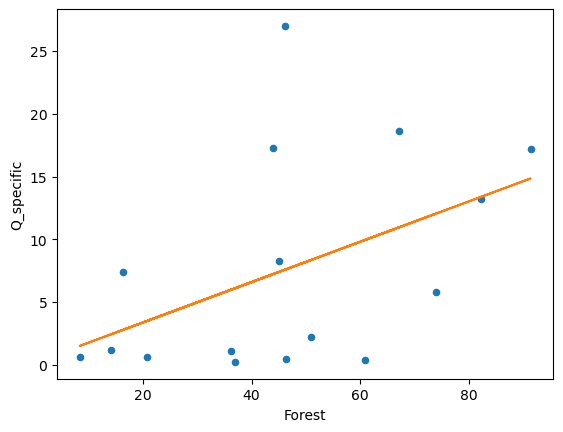

In [267]:
col = 'Forest'
Q = "Q_specific"
df_plot = df_combined_filtered[[Q,col]].copy()
df_plot.dropna(inplace=True)
df_plot.plot(kind='scatter', x=col, y=Q)
z = np.polyfit(df_plot[col], df_plot[Q], 1)
p = np.poly1d(z)
plt.plot(df_plot[col], p(df_plot[col]), color="C1")
plt.savefig(f'Figures\\{col} vs {Q}.png')

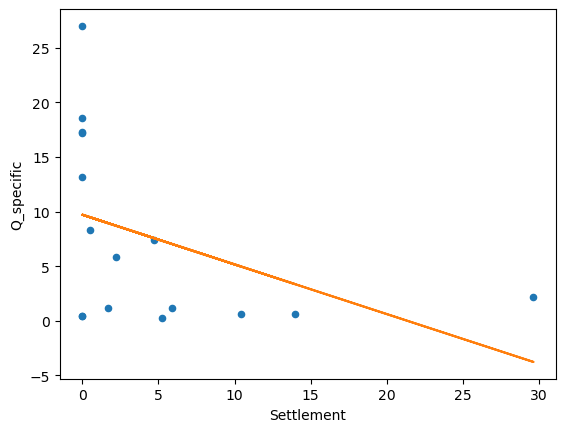

In [268]:
col = 'Settlement'
Q = "Q_specific"
df_plot = df_combined_filtered[[Q,col]].copy()
df_plot.dropna(inplace=True)
df_plot.plot(kind='scatter', x=col, y=Q)
z = np.polyfit(df_plot[col], df_plot[Q], 1)
p = np.poly1d(z)
plt.plot(df_plot[col], p(df_plot[col]), color="C1")
plt.savefig(f'Figures\\{col} vs {Q}.png')

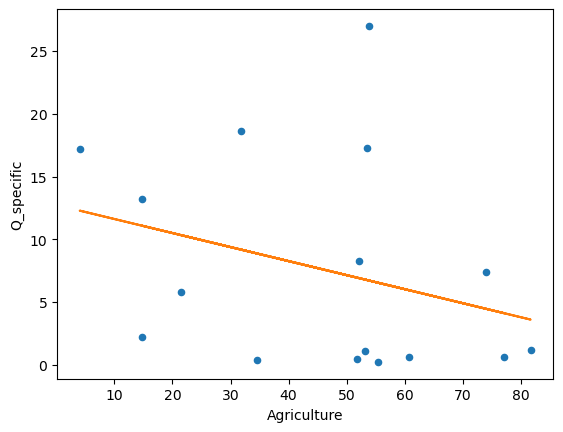

In [269]:
col = 'Agriculture'
Q = "Q_specific"
df_plot = df_combined_filtered[[Q,col]].copy()
df_plot.dropna(inplace=True)
df_plot.plot(kind='scatter', x=col, y=Q)
z = np.polyfit(df_plot[col], df_plot[Q], 1)
p = np.poly1d(z)
plt.plot(df_plot[col], p(df_plot[col]), color="C1")
plt.savefig(f'Figures\\{col} vs {Q}.png')

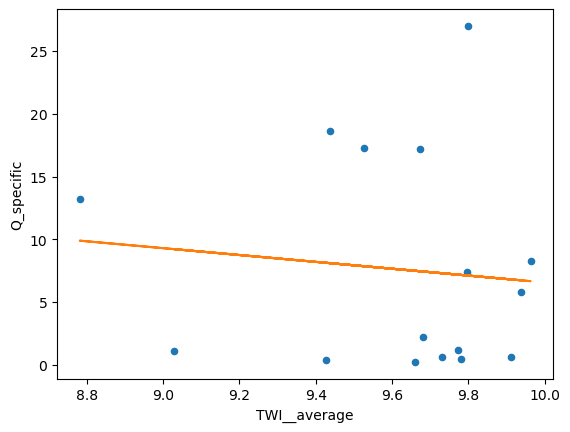

In [270]:
col = 'TWI__average'
Q = 'Q_specific'
df_plot = df_combined_filtered[[Q,col]].copy()
df_plot.dropna(inplace=True)
df_plot.plot(kind='scatter', x=col, y=Q)
z = np.polyfit(df_plot[col], df_plot[Q], 1)
p = np.poly1d(z)
plt.plot(df_plot[col], p(df_plot[col]), color="C1")

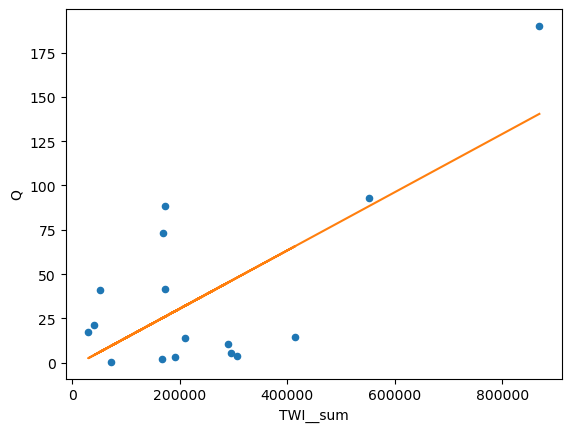

In [271]:
col = 'TWI__sum'
Q = 'Q'
df_plot = df_combined_filtered[[Q,col]].copy()
df_plot.dropna(inplace=True)
df_plot.plot(kind='scatter', x=col, y=Q)
z = np.polyfit(df_plot[col], df_plot[Q], 1)
p = np.poly1d(z)
plt.plot(df_plot[col], p(df_plot[col]), color="C1")